# Project Work, Part 1 - Dashboard Basics
## 1. Introduction
This project involves analyzing data in a Jupyter Notebook and creating a multi-page online app with Streamlit, with all work and code shared on GitHub. AI tools (e.g., ChatGPT) were utilized during the project to clarify requirements and to gain a deeper understanding of the technologies used.

## 2. Repository and App Links
- GitHub: https://github.com/Indraadhikari/IND320_Indra
- Streamlit app: https://ind320-k2r8aymxk9takanegm8e3y.streamlit.app

## 3. Project Log
Before starting the actual task, I created a public repository on GitHub and signed up for a Streamlit account. Since we had to work with weather data, I found it straightforward to load the data into a DataFrame, but plotting different columns together required some extra research. Using Jupyter Notebook allowed me to quickly prototype and visualize the data, and the built-in markdown functionality helped me document my process step by step.

Building the Streamlit app was a completely new experience for me. I followed the lecture materials, read online articles, and checked my progress with the TA during lab sessions. By following the instructions to create a minimum working example, I set up four pages with dummy headers and implemented a sidebar menu for navigation. My biggest challenge was understanding the layout system in Streamlit and connecting it properly to GitHub. However, the Streamlit documentation was clear, and after some trial and error, I managed to display the data table and set up navigation as required.

Additionally, I committed my code to GitHub regularly, writing clear commit messages each time I worked on the project. This helped me keep track of my progress and made it easier to revisit or undo changes when needed.

Throughout the project, I used an AI assistant (ChatGPT) for guidance on certain coding tasks and to review my markdown documentation. This was particularly helpful when I got stuck with some plotting functions in Plotly and needed to find best practices for presenting data on a Streamlit app.

Overall, I feel more confident using Jupyter,GitHub, and Streamlit. And I successfully implemented and tested the project part-1 as requested.

## 4. Loading and Visualising Data

### 4.1 Importing pakages

In [88]:
#importing pakages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

### 4.2 Reading and analysing content of the provided CSV file using Pandas.

In [89]:
df = pd.read_csv("open-meteo-subset.csv", encoding='UTF-8')

df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M") #converting time collumns datatype in correct format- datetime

df.shape 

(8760, 6)

In [90]:
df.columns

Index(['time', 'temperature_2m (°C)', 'precipitation (mm)',
       'wind_speed_10m (m/s)', 'wind_gusts_10m (m/s)',
       'wind_direction_10m (°)'],
      dtype='object')

In [91]:
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


### 4.3 Ploting each column separately using Matplotlib

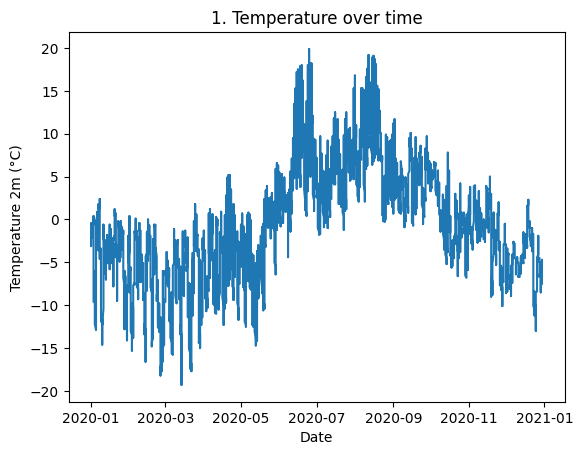

In [92]:
plt.plot(df['time'].dt.date, df['temperature_2m (°C)'])
plt.title('1. Temperature over time')
plt.xlabel('Date')
plt.ylabel('Temperature 2m (°C)')
plt.show()

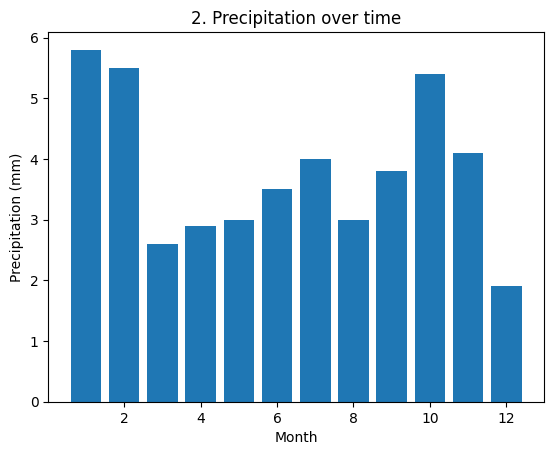

In [93]:
plt.bar(df['time'].dt.month, df['precipitation (mm)'])
plt.title('2. Precipitation over time')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()

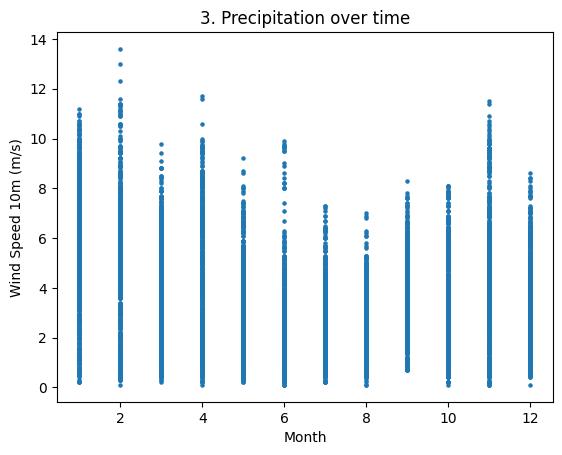

In [94]:
plt.scatter(df['time'].dt.month, df['wind_speed_10m (m/s)'],s=5)
plt.title('3. Precipitation over time')
plt.xlabel('Month')
plt.ylabel('Wind Speed 10m (m/s)')
plt.show()

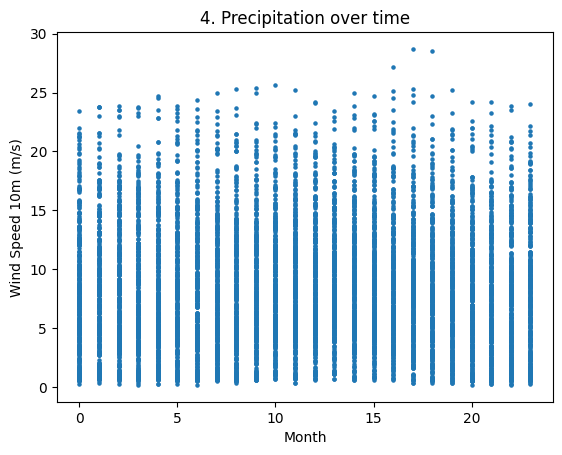

In [95]:
plt.scatter(df['time'].dt.hour, df['wind_gusts_10m (m/s)'],s=5)
plt.title('4. Precipitation over time')
plt.xlabel('Month')
plt.ylabel('Wind Speed 10m (m/s)')
plt.show()

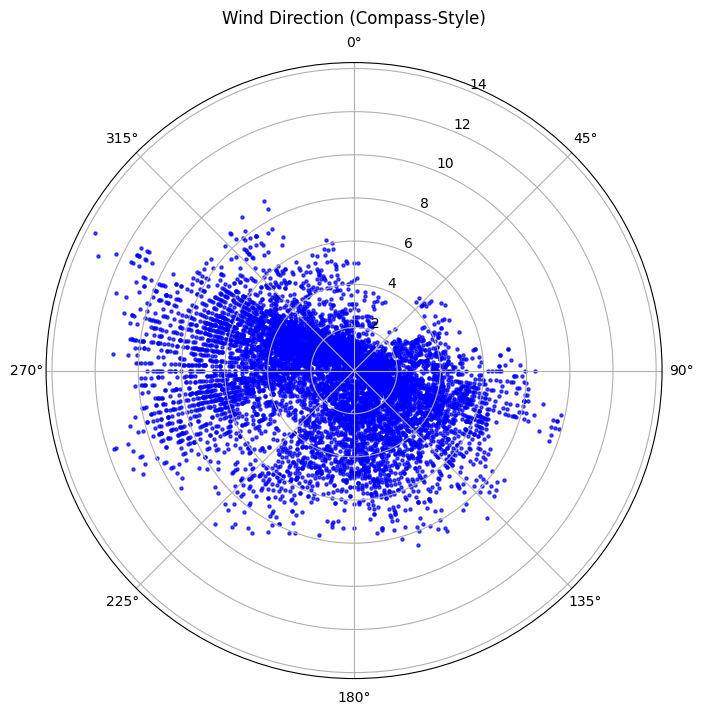

In [96]:
#presenting wind direction in the compass style over the wind speed.
theta = np.radians(df['wind_direction_10m (°)'])
r = df['wind_speed_10m (m/s)']

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
ax.scatter(theta, r, s=5, c='b', alpha=0.7)

ax.set_theta_zero_location("N")   # 0° at North
ax.set_theta_direction(-1)        # clockwise
plt.title("Wind Direction (Compass-Style)", va='bottom')
plt.show()
#get help from the chatgp to understand the task and recomendation to analyse the data (different way to visualise time series data)

### 4.4 Ploting all columns together using plotly

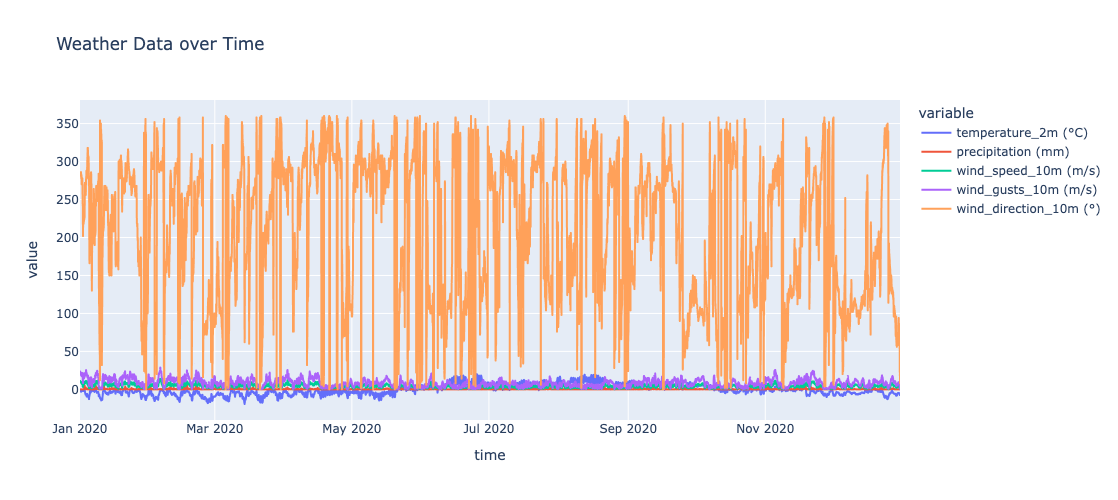

In [97]:
import plotly.express as px

df_long = df.melt(id_vars="time", var_name="variable", value_name="value")

# Interactive multi-line plot
fig = px.line(df_long, x="time", y="value", color="variable",
              title = "Weather Data over Time", width=1000, height=500)
fig.show()